# BAIS 6040 Data Programming in Python

## Spring 2021

## Week 9 Homework

## Group 3: Jared Barkley, Tyler Zaruba, Netaji Boggarapu, Michael Noonan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [2]:
compiledcountydata_dir = "https://raw.githubusercontent.com/jaredbarkley0/PythonGroupProject/master/MN%20County%20Data_032721.csv"
compiledcountydata = pd.read_csv(compiledcountydata_dir)
compiledcountydata

,Unnamed: 0,County,Total Positive Cases,Total Deaths,Population,Rate of Infection,Pop Density,Mean Household Size,Congregate Living Population,No. of Cases in Nursing Homes,No. of Nursing Homes in County,"Nursing Home Cases, % of Total",Cases per number of Nursing Home
0,0,Aitkin,1191,33,15870.0,0.075047,8.0,2.097233,254.0,118.0,4.0,0.099076,29.500000
1,1,Anoka,33391,390,362648.0,0.092076,753.9,2.712716,3753.0,1675.0,35.0,0.050163,47.857143
2,2,Becker,3131,42,34545.0,0.090635,22.8,2.393929,477.0,294.0,8.0,0.093900,36.750000
3,3,Beltrami,3386,51,47184.0,0.071762,14.8,2.487013,1990.0,264.0,11.0,0.077968,24.000000
4,4,Benton,4482,90,40895.0,0.109598,94.4,2.426614,1050.0,557.0,11.0,0.124275,50.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,82,Watonwan,1176,8,10923.0,0.107663,25.4,2.397507,151.0,36.0,3.0,0.030612,12.000000
83,83,Wilkin,677,11,6226.0,0.108738,8.7,2.238850,152.0,36.0,2.0,0.053176,18.000000
84,84,Winona,4193,49,50830.0,0.082491,79.9,2.352632,3855.0,277.0,9.0,0.066062,30.777778
85,85,Wright,12554,116,138531.0,0.090622,178.3,2.796739,1158.0,687.0,20.0,0.054724,34.350000


In [3]:
# Adding column for 'Death Rate' to create a new target for analysis

compiledcountydata['Death Rate'] = compiledcountydata['Total Deaths']/compiledcountydata['Total Positive Cases']

In [4]:
# Check info on dataframe
compiledcountydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        87 non-null     int64  
 1   County                            87 non-null     object 
 2   Total Positive Cases              87 non-null     int64  
 3   Total Deaths                      87 non-null     int64  
 4   Population                        87 non-null     float64
 5   Rate of Infection                 87 non-null     float64
 6   Pop Density                       87 non-null     float64
 7   Mean Household Size               87 non-null     float64
 8   Congregate Living Population      87 non-null     float64
 9   No. of Cases in Nursing Homes     87 non-null     float64
 10  No. of Nursing Homes in County    87 non-null     float64
 11  Nursing Home Cases, % of Total    87 non-null     float64
 12  Cases per 

In [5]:
compiledcountydata.describe()

,Unnamed: 0,Total Positive Cases,Total Deaths,Population,Rate of Infection,Pop Density,Mean Household Size,Congregate Living Population,No. of Cases in Nursing Homes,No. of Nursing Homes in County,"Nursing Home Cases, % of Total",Cases per number of Nursing Home,Death Rate
count,87.000000,87.000000,87.000000,8.700000e+01,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,43.000000,5596.896552,74.954023,6.529123e+04,0.090689,123.595402,2.377683,1516.241379,387.057471,12.275862,0.078468,25.305158,0.013782
std,25.258662,12776.366482,196.143926,1.593879e+05,0.019710,399.364804,0.178347,3632.215103,901.265807,20.907710,0.038908,12.360818,0.007156
min,0.000000,118.000000,0.000000,3.263000e+03,0.021604,1.600000,1.999631,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.500000,997.000000,14.000000,1.077750e+04,0.078862,13.850000,2.256933,199.000000,85.500000,4.000000,0.052831,18.000000,0.008693
50%,43.000000,2097.000000,28.000000,2.197600e+04,0.089838,25.400000,2.363005,374.000000,165.000000,7.000000,0.073751,24.761905,0.013812
75%,64.500000,4008.500000,50.500000,4.419800e+04,0.100678,57.850000,2.454706,1111.500000,320.500000,11.500000,0.100284,33.038462,0.017338
max,86.000000,101110.000000,1588.000000,1.279981e+06,0.176147,3064.900000,2.900663,26867.000000,7457.000000,168.000000,0.242054,65.857143,0.051345


<AxesSubplot:>

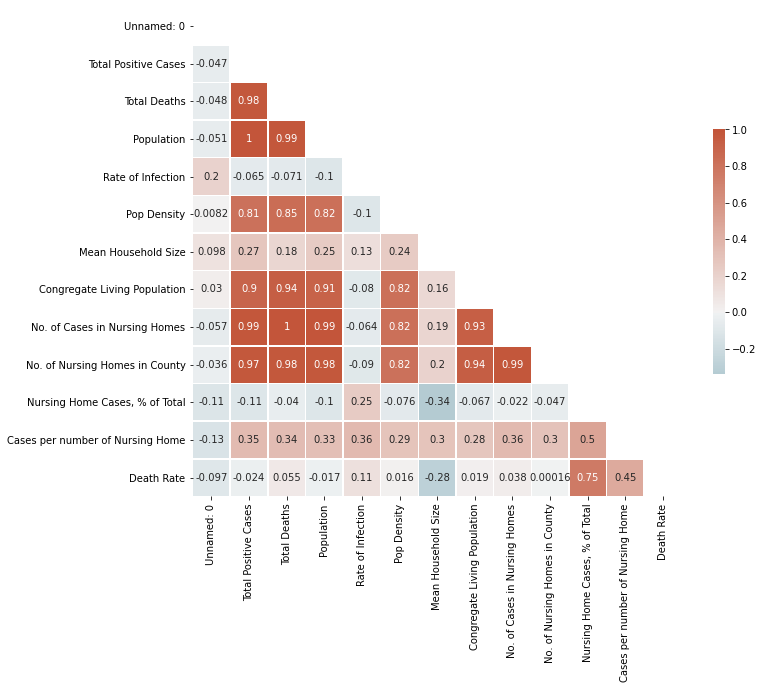

In [66]:
# Create a correlation matrix as a heat map

corr = compiledcountydata.corr()
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Analysis of the correlation matrix indicates we may have high multicollinearity between our variables.  Population, Total Positive Cases, Total Deaths and No. of Cases in Nursing Homes have an almost perfect relationship, suggesting that they are essentially measuring the same thing.  Categories which may be interesting to analyze are the Infection Rate, Death Rate, and total number of deaths.  Since Population, Total Deaths, Total Positive Cases and No. of Cases in Nursing Homes all have correlations greater than 98%, I will only include Total Deaths in my analysis as a target, and will not use the others as explaining variables.

In [7]:
# Commenting this out because the seaborn version is much more powerful

# #Define a function for examining relationships between two variables

# def twovariablelinreg(dataframe,xvar,yvar):
#     columns = xvar
#     target = yvar
    
#     X = dataframe[[columns]]
#     y = dataframe[[target]]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
#     lr = LinearRegression()
#     lr.fit(X_train, y_train)
#     print(f"The score of my two-variable linear regression is {lr.score(X_test, y_test)}")
#     print(f'My R-squared value is {lr.score(X_test, y_test)}')
#     print(f'My slope coefficients are {lr.coef_}')
#     print(f'My intercept is {lr.intercept_}')
#     ypred = lr.predict(X)
#     fig, ax = plt.subplots(figsize = (4,4))
#     #Keeping the figure size small since I plan to do many of these
#     plt.scatter(X, ypred, color='purple')
#     plt.scatter(X,y, color='green')
#     ax.set(title = f'{yvar} by {xvar}', xlabel = xvar, ylabel=yvar)
#     plt.show

# Section 1

## Investigation of individual variables to try to identify base correlations
## I'm Interested in Total Positive Cases, Rate of Infection, and Total Deaths as possible targets, will create plots
## of possible targets versus relevant possible features for initial analysis

In [8]:
# Helper function that allows me to select a target variable and multiple feature variables
# then plot out scatterplots for visual analysis

def plotpairgrid(dataframe, columns, target):
    pairgrid = dataframe[target + columns]
    pairgridplot = sns.PairGrid(pairgrid, y_vars=target, x_vars=columns, height = 5)
    pairgridplot.map(sns.regplot, color="green")
    pairgridplot.map(sns.scatterplot)

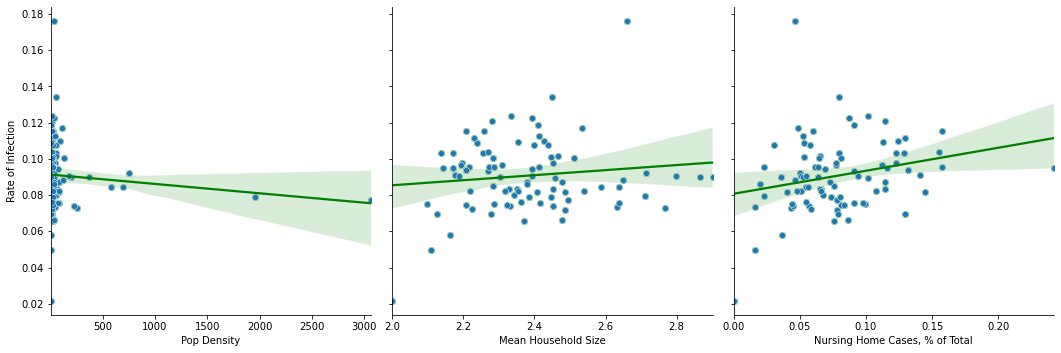

In [9]:
# Examine relationships between rate of infection and other aggregate variables

columns = ['Pop Density','Mean Household Size','Nursing Home Cases, % of Total']
rateofinfectiontarget = ['Rate of Infection']

plotpairgrid(compiledcountydata, columns, rateofinfectiontarget)

### Rate of infection appears to be negatively impacted by pop density, and moderately positively impacted by the mean household size and nursing home case rate.

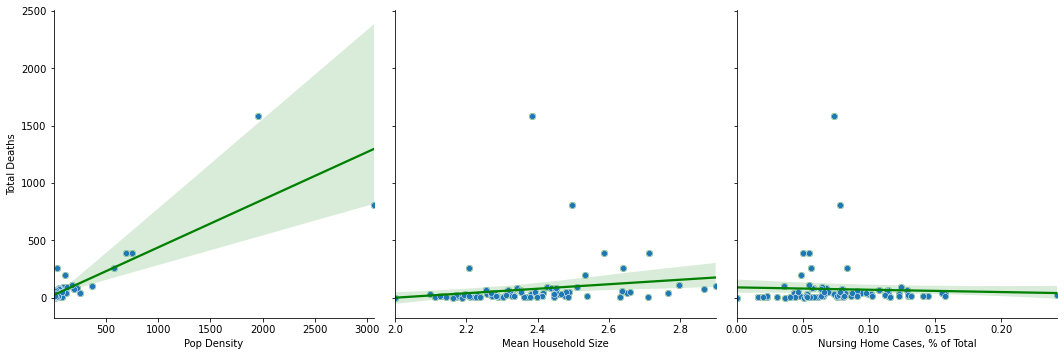

In [10]:
# Examine relationships between Total Deaths and population factors

totaldeathtarget = ['Total Deaths']

plotpairgrid(compiledcountydata, columns, totaldeathtarget)

### Total Deaths appears to have the strongest relationship with Population Density.  Mean Household size appears to have a slightly positive impact, while nursing home case rate does not appear to have a significant relationship.

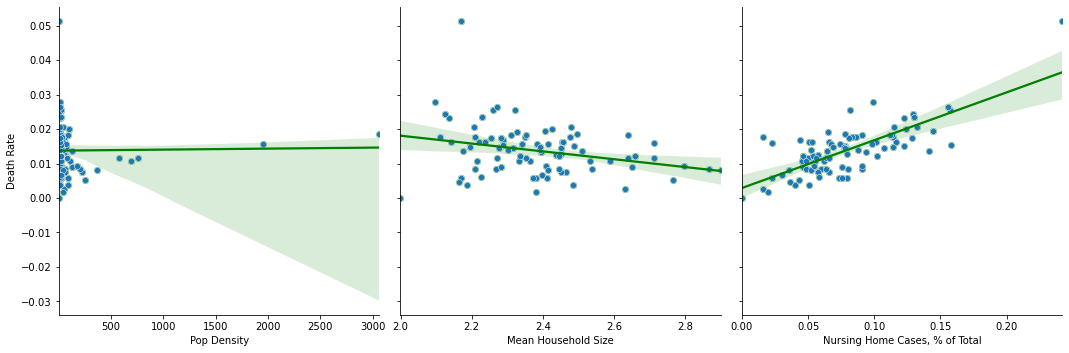

In [12]:
# Examine relationship between Death Rate and population factors

deathratetarget = ['Death Rate']

plotpairgrid(compiledcountydata, columns, deathratetarget)

### The death rate appears to be most strongly correlated with the concentration of cases that are in nursing homes, which makes sense.  Population density seems to have zero impact on the rate of death, while mean household size actually seems to have a slightly negative relationship

# Section 2, multiple linear regression

In [37]:
# Create function for linear regression that uses columns variable and different target variables defined above

def linreg(dataframe,columns,target):
    X = dataframe[columns]
    y = dataframe[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print(f'My R-squared value is {lr.score(X_test, y_test)}')
    print(f'My slope coefficients are {lr.coef_}')
    print(f'My intercept is {lr.intercept_}')

## 2A - Rate of infection, Linear Regression

In [38]:
linreg(compiledcountydata, columns, rateofinfectiontarget)

My R-squared value is 0.21440303006192718
My slope coefficients are [[-6.78897936e-06  3.46622321e-02  1.27466396e-01]]
My intercept is [-0.0014577]


In [39]:
# Overall model is not effective at predicting rate of infection

## 2B - Total Deaths

In [40]:
linreg(compiledcountydata,columns,totaldeathtarget)

My R-squared value is 0.770719263426767
My slope coefficients are [[  0.41746765 -26.75269407   5.93014824]]
My intercept is [91.93297608]


In [41]:
# Overall model is better at predicting total number of deaths.  Pop Density correlates strongly with total population and total death

## 2C - Death Rate

In [42]:
linreg(compiledcountydata,columns,deathratetarget)

My R-squared value is 0.3511423338112841
My slope coefficients are [[1.36139563e-06 1.42580070e-03 1.47644240e-01]]
My intercept is [-0.00146327]


In [43]:
# This model is slightly better at predicting death rate than the infection rate, however it is still 
# not a very good predictor overall.

# Section 3 - Regression with Lasso

In [44]:
# Define a function for lasso analysis

def lassoreg(dataframe,columns,target):
    X = dataframe[columns]
    y = dataframe[target]
    clf= Lasso(alpha=0.1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    clf.fit(X_train, y_train)
    print(f'My R-squared value is {clf.score(X_test, y_test)}')
    print(f'My slope coefficients are {clf.coef_}')
    print(f'My intercept is {clf.intercept_}')

## 3A - Lasso on Rate of Infection

In [45]:
lassoreg(compiledcountydata,columns,rateofinfectiontarget)

My R-squared value is 0.0032785238790582483
My slope coefficients are [-4.53848984e-06  0.00000000e+00  0.00000000e+00]
My intercept is [0.09115782]


In [46]:
# Lasso analysis appears to be much worse than linear regression for this variable

## 3B - Lasso on Total Deaths

In [47]:
lassoreg(compiledcountydata,columns,totaldeathtarget)

My R-squared value is 0.7672173926655772
My slope coefficients are [  0.41716404 -23.46232107   0.        ]
My intercept is [84.63419765]


In [48]:
# Again, regression appears better at predicting Total Deaths rather than rate of death or rate of infection.
# This is a pretty good value but not as good as the linear regression

## 3C - Lasso on Death Rate

In [49]:
lassoreg(compiledcountydata,columns,deathratetarget)

My R-squared value is -0.1058920444221505
My slope coefficients are [ 0. -0.  0.]
My intercept is [0.01424258]


In [50]:
# Lasso analysis appears to be even less effective at predicting death rate than linear regression
# I am not sure how to even interpret a negative r-squared value.

## Summary

### Comparing and contrasting linear regression versus lasso on this dataset, linear regression appears to be slightly more effective at predicting the variables of interest.  However, both methods of regression struggle to explain either the death rate or rate of infection with our available data.  The visual analysis helps us understand that a little better, since we can see that the data for those two features are tightly clustered around the population density variable, but scattered fairly randomly for the other two variables.